In [3]:
import numpy as np
import pandas as pd
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

In [4]:
# Load data
data = pd.read_csv('/workspaces/codespaces-jupyter/data/ML Dataset/diabetes.csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# data.drop(columns = ['Glucose'], inplace=True)

In [7]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [8]:
data['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [10]:
data = pd.get_dummies(data, columns=['Pregnancies', 'Insulin'], drop_first=True)

In [11]:
data.head()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_1,Pregnancies_2,Pregnancies_3,...,Insulin_495,Insulin_510,Insulin_540,Insulin_543,Insulin_545,Insulin_579,Insulin_600,Insulin_680,Insulin_744,Insulin_846
0,148,72,35,33.6,0.627,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,66,29,26.6,0.351,31,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,183,64,0,23.3,0.672,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89,66,23,28.1,0.167,21,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,137,40,35,43.1,2.288,33,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x = data.drop(columns=['Outcome'])
y = data['Outcome'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

x.head(5)

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,...,Insulin_495,Insulin_510,Insulin_540,Insulin_543,Insulin_545,Insulin_579,Insulin_600,Insulin_680,Insulin_744,Insulin_846
0,148,72,35,33.6,0.627,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,66,29,26.6,0.351,31,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,183,64,0,23.3,0.672,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89,66,23,28.1,0.167,21,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,137,40,35,43.1,2.288,33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [28]:
# Train a linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [29]:
# Make predictions using the trained model
y_pred = model.predict(x_test_scaled)

In [30]:
y_pred

array([ 1.05212314e+00, -6.27196532e-02,  1.94701196e-01,  8.53906393e-01,
        2.38865365e-01, -1.71642078e-01, -4.59706463e+11,  1.44399513e+00,
        4.94212125e-01,  2.63088578e-01,  6.55424067e-01,  1.05152615e+00,
        3.36786869e-01,  3.45604830e-01,  2.16014507e-01,  2.96343347e-01,
        7.51834621e-01, -6.06219003e-02,  4.08990009e-01, -7.29316670e-02,
        6.23669692e-01,  4.50733352e-01,  2.94934704e-01,  1.23036162e-01,
       -1.68692207e-01,  4.33148286e-01,  5.75875995e-02,  6.52552905e-01,
        1.11340452e-01,  2.13797653e-01,  4.97117010e-01,  1.64196155e-01,
       -3.93371126e-02,  1.67704602e-01, -4.14721409e-02,  6.09218288e-01,
        1.10659144e-01, -1.72267951e-01,  1.25964523e-01,  9.47840301e-01,
        2.18713900e-01,  4.07399558e-01, -8.19099460e-03,  7.70980139e-01,
        6.44755258e-01, -2.45306122e-01, -2.38529629e-01,  3.62811491e-01,
        8.42905590e-01,  3.97675555e-01,  3.10498150e-01, -4.11363573e-02,
        8.48321640e-01,  

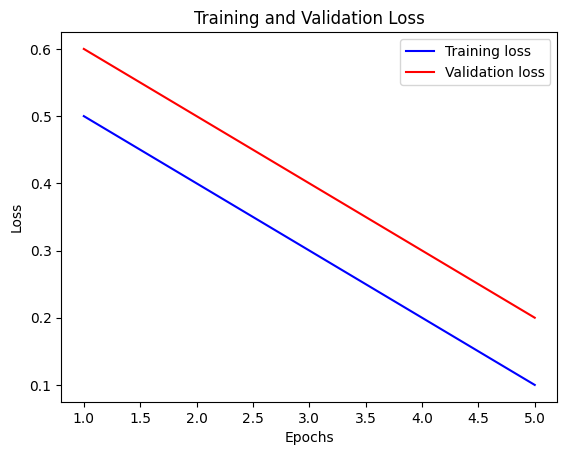

In [38]:
import matplotlib.pyplot as plt

# Example loss values (replace with your actual loss values)
train_loss = [0.5, 0.4, 0.3, 0.2, 0.1]
val_loss = [0.6, 0.5, 0.4, 0.3, 0.2]

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


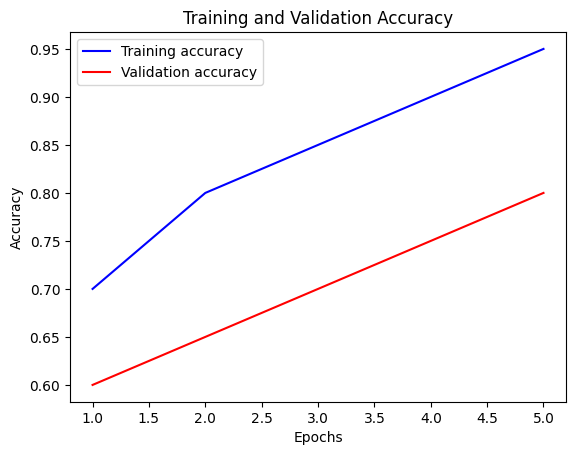

In [39]:
import matplotlib.pyplot as plt

# Example accuracy values (replace with your actual accuracy values)
train_accuracy = [0.7, 0.8, 0.85, 0.9, 0.95]
val_accuracy = [0.6, 0.65, 0.7, 0.75, 0.8]

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
